# Playlist Classification 
## 3 Playlist: 80's - 90's, Salsa, Electronic

### Juan Fernando González
20170085

## Libraries 

In [1]:
# Dataframe and utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import joblib
from IPython.display import Image

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras
from keras import models
from keras.utils import plot_model
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Flatten, Activation 

from ipynb.fs.full.Radar import radar, multi_radar
from ipynb.fs.full.Tools import get_mean, get_attribute, playlist_name, get_attribute2, table

%matplotlib inline

Using TensorFlow backend.


## File Manager

In [2]:
# File path

filepath = r'Dataframe\\'

# Rock Data
#data = 'MusicData'

# Pop Data
#data1 = 'MusicData2'

# Salsa Data
data3 = 'MusicDataNo.1'

In [3]:
# Rock Data

df = pd.read_csv(filepath + data3 +'.csv') 

df_copy = pd.read_csv(filepath + data3 +'.csv') 

## Dataframe Information

In [4]:
df.head()

,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,TOTO,Toto IV,Africa,2374M0fQpWi3dLnB54qaLX,0.257000,0.671,0.373,9,-18.064,1,0.0323,0.000080,0.0481,0.732,92.717,295893,4,"Varias (80s,90s...)"
1,TOTO,Toto,Hold the Line,4aVuWgvD0X63hcOCnZtNFA,0.007830,0.473,0.898,6,-4.797,0,0.0561,0.061800,0.1730,0.808,96.556,235547,4,"Varias (80s,90s...)"
2,TOTO,Toto IV,Rosanna,37BTh5g05cxBIRYMbw8g2T,0.021300,0.384,0.512,7,-13.035,0,0.0358,0.000139,0.2050,0.739,78.442,331200,4,"Varias (80s,90s...)"
3,U2,The Best of 1980-1990 & B-Sides,With Or Without You,2JZfTvWWtpaE8NohqRXqFr,0.000128,0.546,0.485,2,-9.424,1,0.0270,0.318000,0.0939,0.106,109.913,295200,4,"Varias (80s,90s...)"
4,U2,U218 Singles (Deluxe Version),Beautiful Day,0G5F2msfVO77xs7ql2RiTS,0.022500,0.541,0.914,2,-6.727,1,0.0520,0.000441,0.3530,0.449,136.282,245707,4,"Varias (80s,90s...)"


In [5]:
df.tail()

,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
1637,Kerri Chandler,Bar A Thym (Supernova Remix Deluxe),Bar A Thym (Original),5sEsABi0eX7MxBQR0uYKaT,0.00045,0.806,0.869,10,-4.553,0,0.0570,0.9080,0.0570,0.7580,125.993,444624,4,Electronic
1638,Jean-Michel Jarre,Oxygène,"Oxygene, Pt. 4",0Tt2jli0yAD1MKSTb5MvS2,0.02340,0.430,0.755,7,-8.457,0,0.0365,0.5910,0.5510,0.6570,188.904,246893,3,Electronic
1639,FC Kahuna,Machine Says Yes,Hayling (feat. Hafdis Huld),58eKLwmiYrJAqNlv96pwlP,0.49500,0.555,0.329,5,-9.188,1,0.0279,0.0154,0.6690,0.0391,140.038,407973,4,Electronic
1640,Hollis P. Monroe,I'M Lonely,I'm Lonely,7iEgoNG4xlbpTxLuMNrBl5,0.00102,0.656,0.864,7,-6.423,1,0.0444,0.7870,0.1580,0.8150,133.305,413120,4,Electronic
1641,DJ Q,Twentyfourseven,Optiumum Thinking,50ti9tKpZpgmT3BCe4Ezi0,0.04850,0.838,0.733,6,-10.467,1,0.0308,0.8670,0.0825,0.5450,127.889,457960,4,Electronic


In [6]:
print("Shape of dataframe: ", df.shape)

Shape of dataframe:  (1642, 18)


In [7]:
# Types of the dataframe

print("   ------ Types ------")
df.dtypes

   ------ Types ------


artist               object
album                object
track_name           object
track_id             object
acousticness        float64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
playlist             object
dtype: object

In [8]:
print('Dataframe Columns: ', df.columns)

Dataframe Columns:  Index(['artist', 'album', 'track_name', 'track_id', 'acousticness',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'playlist'],
      dtype='object')


## Data Exploration

1. Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

2. Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 

3. Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 

4. Key: The estimated overall key of the section. The values in this field ranging from 0 to 11 mapping to pitches using standard Pitch Class notation (E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on).

5. Loudness: The overall loudness of the section in decibels (dB).

6. Mode: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. This field will contain a 0 for “minor”, a 1 for “major”, or a -1 for no result.

7. Speechiness: Speechiness detects the presence of spoken words in a track.

8. Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. 

9. Liveness: Detects the presence of an audience in the recording.

10. Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

11. Tempo: 	The overall estimated tempo of the section in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

12. Duration_ms: 	The duration of the track in milliseconds.

13. Time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). 

14. Playlist: The playlist of the track

### Key

In [9]:
print("Unique values of Key: \n", df['key'].unique())

Unique values of Key: 
 [ 9  6  7  2  0  1  4  5  8 11 10  3]


	 -------- Pitch Class --------



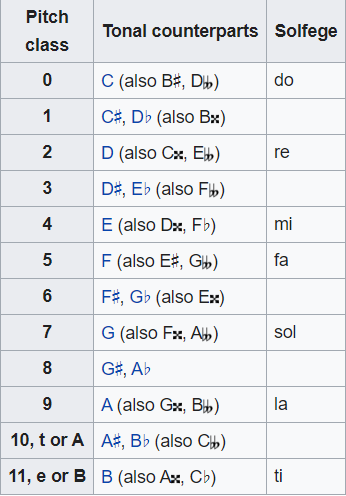

In [10]:
print("\t -------- Pitch Class --------\n")
Image(filename='./pics/pitch.png') 

### Time Signature

In [11]:
print("Unique values of time_signature: \n", df['time_signature'].unique())

Unique values of time_signature: 
 [4 3 5]


### Get each playlist dataframe

##### Varias (80s,90s...)

In [12]:
varias = df.loc[df['playlist'] == 'Varias (80s,90s...)']

In [13]:
# Show some statistics about dataset

varias.describe()

,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,0.163426,0.627745,0.697113,5.417103,-8.282187,0.609075,0.044079,0.039352,0.179365,0.654291,120.977583,270819.966841,3.980803
std,0.187194,0.133261,0.168413,3.684999,3.020589,0.488384,0.024718,0.132071,0.166371,0.237915,24.685935,65070.013822,0.160794
min,0.000077,0.197000,0.144000,0.000000,-20.001000,0.000000,0.022300,0.000000,0.025100,0.047100,67.970000,141693.000000,3.000000
25%,0.019300,0.546000,0.578000,2.000000,-10.060000,0.000000,0.030500,0.000003,0.080900,0.486000,104.414000,230133.000000,4.000000
50%,0.091700,0.643000,0.715000,6.000000,-7.772000,1.000000,0.036700,0.000148,0.118000,0.706000,117.778000,257440.000000,4.000000
75%,0.245000,0.726000,0.830000,9.000000,-5.938000,1.000000,0.047800,0.004990,0.214000,0.860000,132.752000,294613.000000,4.000000
max,0.994000,0.928000,0.993000,11.000000,-2.011000,1.000000,0.302000,0.954000,0.990000,0.980000,204.789000,834867.000000,5.000000


##### Salsa

In [14]:
salsa = df.loc[df['playlist'] == 'Salsa']

In [15]:
# Show some statistics about dataset

salsa.describe()

,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.0
mean,0.500503,0.654621,0.712093,4.858156,-7.300046,0.492908,0.051900,0.048967,0.169998,0.833094,116.394505,286375.489362,4.0
std,0.210254,0.100937,0.132921,3.380188,2.907996,0.500394,0.027622,0.172773,0.163562,0.127334,31.772503,63291.185759,0.0
min,0.001740,0.389000,0.068300,0.000000,-18.793000,0.000000,0.028000,0.000000,0.023000,0.178000,75.005000,144949.000000,4.0
25%,0.363500,0.582750,0.635000,2.000000,-9.011250,0.000000,0.037800,0.000003,0.070975,0.759750,92.817250,249661.000000,4.0
50%,0.528000,0.661000,0.721000,5.000000,-6.580500,0.000000,0.044050,0.000112,0.108000,0.874500,102.178000,286983.500000,4.0
75%,0.664250,0.730250,0.810250,7.000000,-5.253500,1.000000,0.054425,0.003935,0.223000,0.930000,135.918000,313300.000000,4.0
max,0.971000,0.938000,0.969000,11.000000,-1.792000,1.000000,0.321000,0.926000,0.992000,0.976000,200.857000,626827.000000,4.0


##### Electronic

In [16]:
Electronic = df.loc[df['playlist'] == 'Electronic']

In [17]:
# Show some statistics about dataset

varias.describe()

,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,0.163426,0.627745,0.697113,5.417103,-8.282187,0.609075,0.044079,0.039352,0.179365,0.654291,120.977583,270819.966841,3.980803
std,0.187194,0.133261,0.168413,3.684999,3.020589,0.488384,0.024718,0.132071,0.166371,0.237915,24.685935,65070.013822,0.160794
min,0.000077,0.197000,0.144000,0.000000,-20.001000,0.000000,0.022300,0.000000,0.025100,0.047100,67.970000,141693.000000,3.000000
25%,0.019300,0.546000,0.578000,2.000000,-10.060000,0.000000,0.030500,0.000003,0.080900,0.486000,104.414000,230133.000000,4.000000
50%,0.091700,0.643000,0.715000,6.000000,-7.772000,1.000000,0.036700,0.000148,0.118000,0.706000,117.778000,257440.000000,4.000000
75%,0.245000,0.726000,0.830000,9.000000,-5.938000,1.000000,0.047800,0.004990,0.214000,0.860000,132.752000,294613.000000,4.000000
max,0.994000,0.928000,0.993000,11.000000,-2.011000,1.000000,0.302000,0.954000,0.990000,0.980000,204.789000,834867.000000,5.000000


## Audio Features 

#### Varias

In [18]:
# Get the attributes of playlist

varias_ = get_attribute(varias)

### Rock

In [19]:
# Get the attributes of playlist

salsa_ = get_attribute(salsa)

### Electronic

In [20]:
# Get the attributes of playlist

electronic_ = get_attribute(Electronic)

### Radar Chart

In [21]:
# Classes 

playlists_names = ['Varias', 'Salsa', 'Electronic']

In [22]:
# Features

r = varias_
r1 = salsa_
r2 = electronic_

In [23]:
# Features column name
imp_features = ['acousticness', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence']

categories = imp_features

In [24]:
# To plot each playlist individual
#radar(df, categories, r1)

In [61]:
# Plot playlist together

multi_radar(categories, r, r1, r2, playlists_names, 'Dis#1')

### Correlation Map

### General Correltion Map

[Text(0.5, 1.0, 'Correlation')]

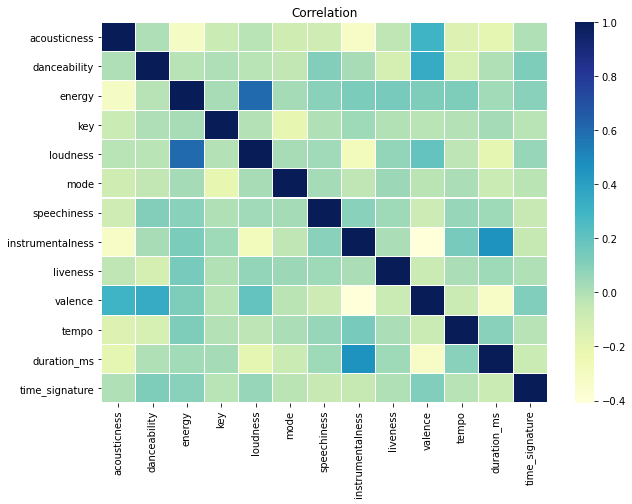

In [26]:
corrmat = df.corr(method='pearson') 
  
f, ax = plt.subplots(figsize =(10,7)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
ax.set(title='Correlation')

### Correlation Map for Varias playlist

[Text(0.5, 1.0, 'Correlation')]

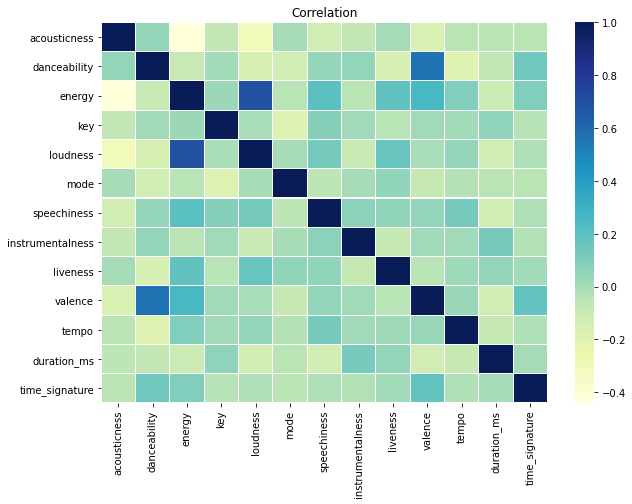

In [27]:
corrmat = varias.corr(method='pearson') 
  
f, ax = plt.subplots(figsize =(10,7)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
ax.set(title='Correlation')

### Correlation Map for Electronic playlist

[Text(0.5, 1.0, 'Correlation')]

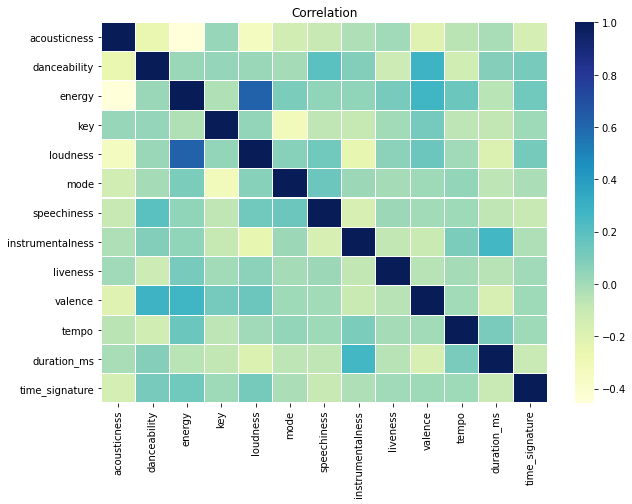

In [28]:
corrmat = Electronic.corr(method='pearson') 
  
f, ax = plt.subplots(figsize =(10,7)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
ax.set(title='Correlation')

### Correlation Map for Salsa playlist

[Text(0.5, 1.0, 'Correlation')]

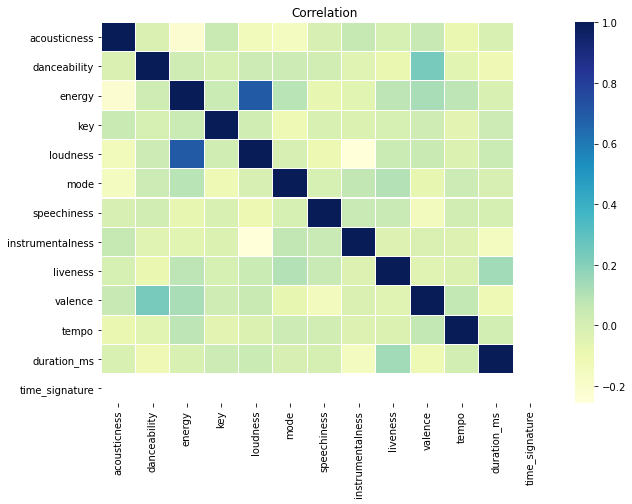

In [29]:
corrmat = salsa.corr(method='pearson') 
  
f, ax = plt.subplots(figsize =(10,7)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
ax.set(title='Correlation')

### Removing irrelevant columns

In [30]:
# Removing Irrelevant columns 

df.drop(['artist', 'album', 'track_name', 'track_id', 'speechiness', 'duration_ms'], axis=1, inplace=True)

In [31]:
df.head()

,acousticness,danceability,energy,key,loudness,mode,instrumentalness,liveness,valence,tempo,time_signature,playlist
0,0.257000,0.671,0.373,9,-18.064,1,0.000080,0.0481,0.732,92.717,4,"Varias (80s,90s...)"
1,0.007830,0.473,0.898,6,-4.797,0,0.061800,0.1730,0.808,96.556,4,"Varias (80s,90s...)"
2,0.021300,0.384,0.512,7,-13.035,0,0.000139,0.2050,0.739,78.442,4,"Varias (80s,90s...)"
3,0.000128,0.546,0.485,2,-9.424,1,0.318000,0.0939,0.106,109.913,4,"Varias (80s,90s...)"
4,0.022500,0.541,0.914,2,-6.727,1,0.000441,0.3530,0.449,136.282,4,"Varias (80s,90s...)"


#### Varias

In [32]:
varias_2 = get_attribute2(varias)

### Rock

In [33]:
salsa_2 = get_attribute2(salsa)

### Electronic

In [34]:
electronic_2 = get_attribute2(Electronic)

### Radar Chart after data cleaning

In [35]:
# Features column name
new_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

categories2 = new_features

In [36]:
# Features
r_ = varias_2
r1_ = salsa_2
r2_ = electronic_2

In [62]:
multi_radar(categories2, r_, r1_, r2_, playlists_names, 'Dis#2')

### Encoding Key and time signature

In [38]:
# for dummy variable encoding for key

xs = pd.get_dummies(df, columns=['key', 'time_signature'])

# Removing Y label 

xs.drop(['playlist'], axis=1, inplace=True)


xs.head()

,acousticness,danceability,energy,loudness,mode,instrumentalness,liveness,valence,tempo,key_0,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5
0,0.257000,0.671,0.373,-18.064,1,0.000080,0.0481,0.732,92.717,0,...,0,0,0,0,1,0,0,0,1,0
1,0.007830,0.473,0.898,-4.797,0,0.061800,0.1730,0.808,96.556,0,...,0,1,0,0,0,0,0,0,1,0
2,0.021300,0.384,0.512,-13.035,0,0.000139,0.2050,0.739,78.442,0,...,0,0,1,0,0,0,0,0,1,0
3,0.000128,0.546,0.485,-9.424,1,0.318000,0.0939,0.106,109.913,0,...,0,0,0,0,0,0,0,0,1,0
4,0.022500,0.541,0.914,-6.727,1,0.000441,0.3530,0.449,136.282,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
xs.columns

Index(['acousticness', 'danceability', 'energy', 'loudness', 'mode',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

### Encoding the playlist dependent variable

In [40]:
genre_list = df.iloc[:, -1]

In [41]:
genre_list

0       Varias (80s,90s...)
1       Varias (80s,90s...)
2       Varias (80s,90s...)
3       Varias (80s,90s...)
4       Varias (80s,90s...)
               ...         
1637             Electronic
1638             Electronic
1639             Electronic
1640             Electronic
1641             Electronic
Name: playlist, Length: 1642, dtype: object

In [42]:
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

### Dividing data into training and Testing set

In [43]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2)

In [44]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [45]:
print('X Train data shape: ', X_train.shape)
print('X Test data shape: ', X_test.shape)
print('Y Train data shape: ', y_train.shape)
print('Y Test data shape: ', y_test.shape)

X Train data shape:  (1313, 24)
X Test data shape:  (329, 24)
Y Train data shape:  (1313,)
Y Test data shape:  (329,)


In [46]:
print('Total Features: ', X_train.shape[1])

Total Features:  24


## CNN Architecture V1

In [40]:
# Define the CNN 

NN = models.Sequential(name='Cool CNN')

### Building our Network

In [41]:
# Layers

NN.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

NN.add(layers.Dense(128, activation='relu'))

NN.add(layers.Dense(64, activation='relu'))

NN.add(layers.Dense(32, activation='relu'))

In [42]:
# Output layer

NN.add(layers.Dense(3, activation='softmax'))

### Compile the Model

In [43]:
NN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(NN.summary())
print('\n\t -------------------- Compiled! --------------------')

Model: "Cool CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               6400      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 49,731
Trainable params: 49,731
Non-trainable params: 0
_________________________________________________________________
None

	 -------------------- Compiled! --------------------


## Load the Model

In [47]:
# load the model from disk
filenames = 'finalized_model_V1.sav'
NN = joblib.load(filenames)
test_loss, test_acc = NN.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)
print('Test loss:    ', test_loss)

329/329 [==============================] - 0s 470us/step

Test accuracy: 0.802431583404541
Test loss:     0.4312465315894153


### Training the Model

In [44]:
model_history = NN.fit(X_train, y_train,
                       batch_size = 16,
                       epochs = 50,
                       validation_data=(X_test, y_test),
                       shuffle=True, verbose=1)

Train on 1313 samples, validate on 329 samples
Epoch 1/50
1313/1313 [==============================] - 1s 457us/step - loss: 1.4173 - accuracy: 0.3526 - val_loss: 1.0804 - val_accuracy: 0.3283
Epoch 2/50
1313/1313 [==============================] - 0s 134us/step - loss: 1.1604 - accuracy: 0.3869 - val_loss: 0.9933 - val_accuracy: 0.5593
Epoch 3/50
1313/1313 [==============================] - 0s 131us/step - loss: 1.0106 - accuracy: 0.4874 - val_loss: 1.1192 - val_accuracy: 0.3526
Epoch 4/50
1313/1313 [==============================] - 0s 141us/step - loss: 0.8773 - accuracy: 0.5834 - val_loss: 0.8221 - val_accuracy: 0.5745
Epoch 5/50
1313/1313 [==============================] - 0s 152us/step - loss: 0.7751 - accuracy: 0.6344 - val_loss: 0.7025 - val_accuracy: 0.7112
Epoch 6/50
1313/1313 [==============================] - 0s 157us/step - loss: 0.6822 - accuracy: 0.6824 - val_loss: 0.6523 - val_accuracy: 0.7295
Epoch 7/50
1313/1313 [==============================] - 0s 150us/step - loss:

### Analize training history and results

In [45]:
def plot_hist(model_history):
    fix,axs=plt.subplots(2,1,figsize=(20,8))
    ax1 = axs[0]
    ax1.plot(model_history.history['accuracy'])
    ax1.plot(model_history.history['val_accuracy'],c='g')
    ax1.set_title('Model accuracy',fontsize=16)
    ax1.set_ylabel('Accuracy',fontsize=8)
    ax1.set_xlabel('Epoch',fontsize=8)
    ax1.grid(alpha=0.3)
    ax1.legend(['Train', 'Test'], loc='upper left')


    # # summarize history for loss
    ax2 = axs[1]
    ax2.plot(model_history.history['loss'],c='r')
    ax2.plot(model_history.history['val_loss'],c='orange')
    ax2.set_title('Model loss',fontsize=16)
    ax2.set_ylabel('Accuracy',fontsize=8)
    ax2.set_xlabel('Epoch',fontsize=8)
    ax2.grid(alpha=0.3)
    ax2.legend(['train', 'test'], loc='upper right')
    plt.show()

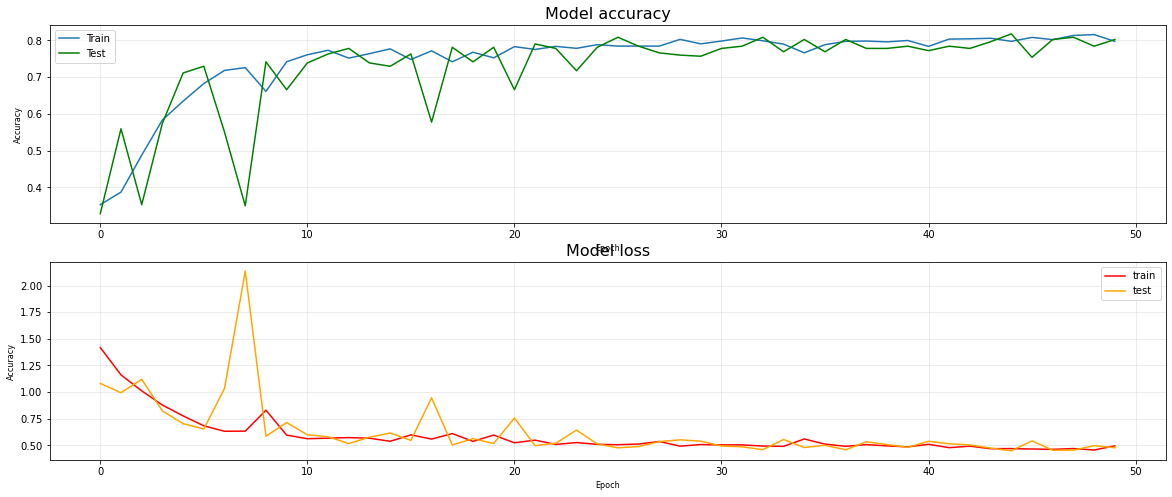

In [46]:
plot_hist(model_history)

In [48]:
test_loss, test_acc = NN.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)
print('Test loss:    ', test_loss)

329/329 [==============================] - 0s 36us/step

Test accuracy: 0.8389057517051697
Test loss:     0.43146259231226786


### Make Predictions

In [48]:
# Make prediction.

pred = NN.predict(X_test)

### Class Encoding:

0. Electronic
1. Salsa 
2. Varias (80's, 90's...)

### Visualize Predictions

In [49]:
pred[0]

array([2.7686008e-05, 9.9705911e-01, 2.9132043e-03], dtype=float32)

In [50]:
tab = table(pred[0])

In [51]:
np.argmax(pred[0])

1

In [52]:
print(tab)

+------------+---------------+
|  Playlist  |   Prediction  |
+------------+---------------+
| Electronic | 2.7686008e-05 |
|   Salsa    |   0.9970591   |
|   Varias   |  0.0029132043 |
+------------+---------------+


In [53]:
# Get the index of the Predicted values

x_test_index = X_test.index.values.tolist()

In [54]:
df_copy['playlist'][x_test_index[0]]

'Salsa'

Track: Quien Ha Visto por Ahí Mi Sombrero de Yare

True Playlist:  Salsa 

Predicted Playlist: Salsa



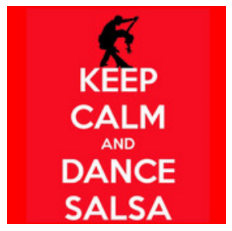

	 --------------------------------------------------------- 

Track: Right Down the Line

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Varias (80s,90s...)



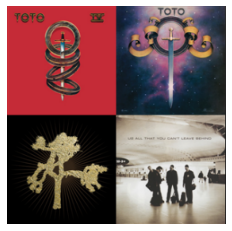

	 --------------------------------------------------------- 

Track: Que Locura Enamorarme De Ti

True Playlist:  Salsa 

Predicted Playlist: Salsa



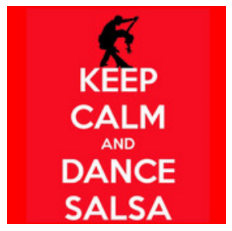

	 --------------------------------------------------------- 

Track: Luv Dancin' - Extended Vocal

True Playlist:  Electronic 

Predicted Playlist: Electronic



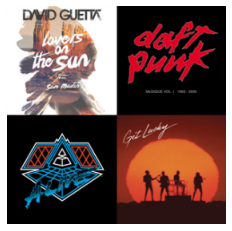

	 --------------------------------------------------------- 

Track: Stop Loving You

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Varias (80s,90s...)



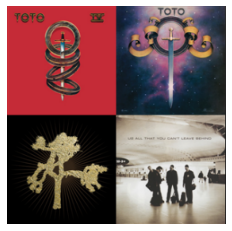

	 --------------------------------------------------------- 

Track: Quitate La Mascara

True Playlist:  Salsa 

Predicted Playlist: Salsa



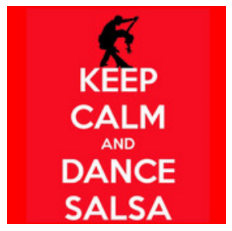

	 --------------------------------------------------------- 

Track: Chin Chon Chow

True Playlist:  Salsa 

Predicted Playlist: Salsa



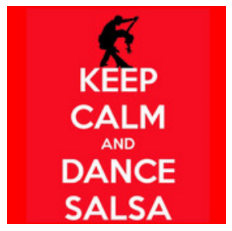

	 --------------------------------------------------------- 

Track: Major Tom - Coming Home

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Varias (80s,90s...)



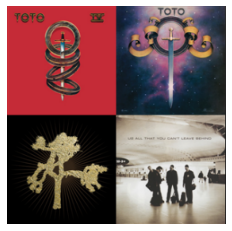

	 --------------------------------------------------------- 

Track: Precious to Me

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Varias (80s,90s...)



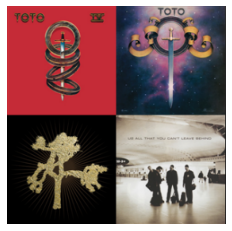

	 --------------------------------------------------------- 

Track: Que Pena

True Playlist:  Salsa 

Predicted Playlist: Salsa



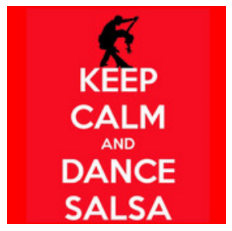

	 --------------------------------------------------------- 

Track: All I Need Is a Miracle

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Varias (80s,90s...)



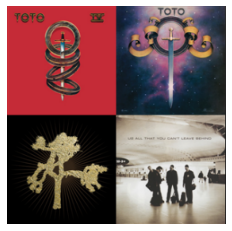

	 --------------------------------------------------------- 

Track: Messiah

True Playlist:  Electronic 

Predicted Playlist: Electronic



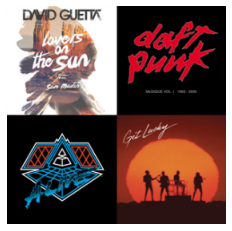

	 --------------------------------------------------------- 

Track: Echao Pa' Lante

True Playlist:  Salsa 

Predicted Playlist: Varias (80s,90s...)



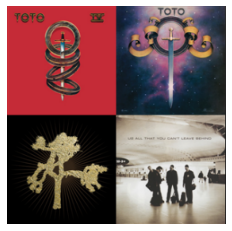

	 --------------------------------------------------------- 

Track: Talking In Your Sleep

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Varias (80s,90s...)



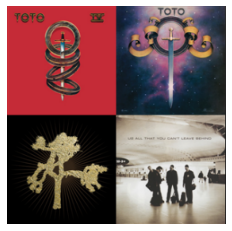

	 --------------------------------------------------------- 

Track: Lazy

True Playlist:  Electronic 

Predicted Playlist: Varias (80s,90s...)



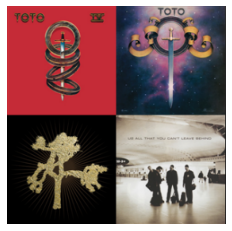

	 --------------------------------------------------------- 



In [57]:
plays = ['Electronic', 'Salsa', 'Varias (80s,90s...)']

for i in range(0, 15):
    
    tp = df_copy['playlist'][x_test_index[i]]
    tt = df_copy['track_name'][x_test_index[i]]
    p = np.argmax(pred[i])
    
    if (p == 0):
        
        print('Track: ' + tt +'\n')
        print('True Playlist: ', tp, '\n')
        print('Predicted Playlist: ' + plays[p] +'\n')
        img = mpimg.imread('./pics/' +str(p) + '.png')
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.show()
        print('\t --------------------------------------------------------- \n')
        
    elif (p == 1):
        
        print('Track: ' + tt +'\n')
        print('True Playlist: ', tp, '\n')
        print('Predicted Playlist: ' + plays[p] +'\n')
        img = mpimg.imread('./pics/' +str(p) + '.png')
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.show()
        print('\t --------------------------------------------------------- \n')
        
    elif (p == 2):
        
        print('Track: ' + tt +'\n')
        print('True Playlist: ', tp, '\n')
        print('Predicted Playlist: ' + plays[p] +'\n')
        img = mpimg.imread('./pics/' +str(p) + '.png')
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.show()
        print('\t --------------------------------------------------------- \n')  

## CNN Architecture V2

In [46]:
# Define the CNN 

NNV2 = models.Sequential(name='Cool CNN V2')

### Building our Network

In [47]:
# Layers

NNV2.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

NNV2.add(layers.Dense(256, activation='relu'))

NNV2.add(layers.Dense(64, activation='relu'))

In [48]:
#CNN.add(Flatten())

NNV2.add(layers.Dense(3, activation='softmax'))

### Compile the Model

In [49]:
NNV2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(NNV2.summary())
print('\n\t -------------------- Compiled! --------------------')

Model: "Cool CNN V2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               12288     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total params: 160,259
Trainable params: 160,259
Non-trainable params: 0
_________________________________________________________________
None

	 -------------------- Compiled! --------------------


### Training the Model

In [50]:
model_history2 = NNV2.fit(X_train, y_train,
                        batch_size = 16,
                        epochs = 50,
                        validation_data=(X_test, y_test),
                        verbose=1)

Train on 1313 samples, validate on 329 samples
Epoch 1/50
1313/1313 [==============================] - 1s 386us/step - loss: 1.7759 - accuracy: 0.3328 - val_loss: 2.1575 - val_accuracy: 0.2766
Epoch 2/50
1313/1313 [==============================] - 0s 208us/step - loss: 1.3220 - accuracy: 0.4417 - val_loss: 1.0165 - val_accuracy: 0.5258
Epoch 3/50
1313/1313 [==============================] - 0s 190us/step - loss: 1.1280 - accuracy: 0.4684 - val_loss: 0.9346 - val_accuracy: 0.5927
Epoch 4/50
1313/1313 [==============================] - 0s 211us/step - loss: 0.8200 - accuracy: 0.6413 - val_loss: 0.9319 - val_accuracy: 0.4498
Epoch 5/50
1313/1313 [==============================] - 0s 195us/step - loss: 0.7355 - accuracy: 0.6512 - val_loss: 0.6473 - val_accuracy: 0.7204
Epoch 6/50
1313/1313 [==============================] - 0s 187us/step - loss: 0.6368 - accuracy: 0.7357 - val_loss: 1.9126 - val_accuracy: 0.4286
Epoch 7/50
1313/1313 [==============================] - 0s 204us/step - loss:

### Analize training history and results

In [51]:
def plot_hist(model_history):
    fix,axs=plt.subplots(2,1,figsize=(20,8))
    ax1 = axs[0]
    ax1.plot(model_history.history['accuracy'])
    ax1.plot(model_history.history['val_accuracy'],c='g')
    ax1.set_title('Model accuracy',fontsize=16)
    ax1.set_ylabel('Accuracy',fontsize=8)
    ax1.set_xlabel('Epoch',fontsize=8)
    ax1.grid(alpha=0.3)
    ax1.legend(['Train', 'Test'], loc='upper left')


    # # summarize history for loss
    ax2 = axs[1]
    ax2.plot(model_history.history['loss'],c='r')
    ax2.plot(model_history.history['val_loss'],c='orange')
    ax2.set_title('Model loss',fontsize=16)
    ax2.set_ylabel('Accuracy',fontsize=8)
    ax2.set_xlabel('Epoch',fontsize=8)
    ax2.grid(alpha=0.3)
    ax2.legend(['train', 'test'], loc='upper right')
    plt.show()

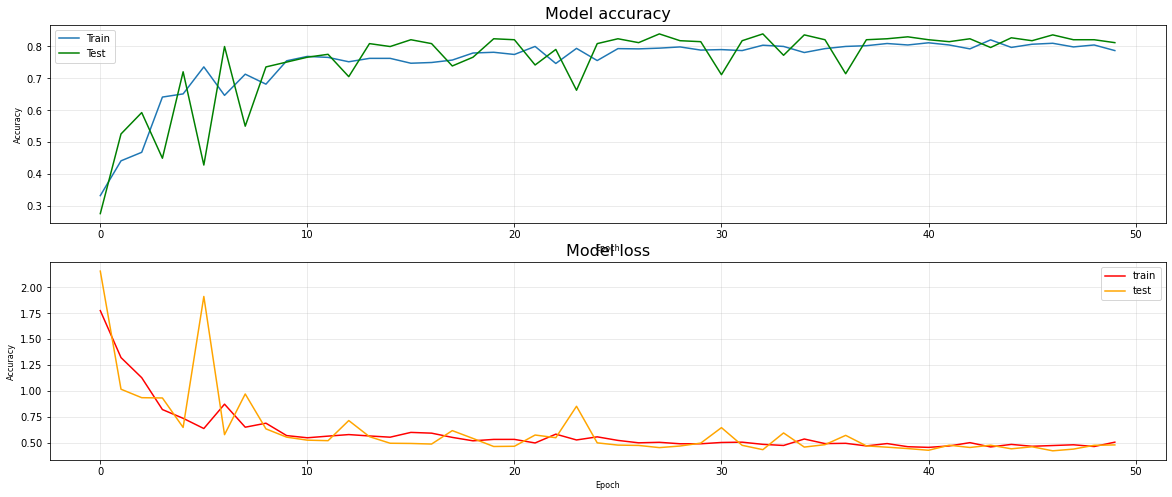

In [52]:
plot_hist(model_history2)

In [53]:
test_loss2, test_acc2 = NNV2.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc2)
print('Test loss:    ', test_loss2)

329/329 [==============================] - 0s 49us/step

Test accuracy: 0.8115501403808594
Test loss:     0.4784790239435561


## Make prediction with the test data

In [55]:
# Make prediction.

pred2 = NNV2.predict(X_test)

## Check Prediction

In [56]:
pred2[0]

array([0.00170923, 0.91982436, 0.07846633], dtype=float32)

In [58]:
tab = table(pred2[0])

In [59]:
print(tab)

+------------+--------------+
|  Playlist  |  Prediction  |
+------------+--------------+
| Electronic | 0.0017092315 |
|   Salsa    |  0.91982436  |
|   Varias   |  0.07846633  |
+------------+--------------+


In [61]:
np.argmax(pred2[0])

1

In [62]:
x_test_index = X_test.index.values.tolist()

In [47]:
df_copy['playlist'][x_test_index[1]]

'Electronic'

Track: Aparentemente

True Playlist:  Salsa 

Predicted Playlist: Salsa



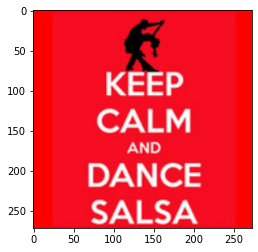

	 --------------------------------------------------------- 

Track: Sali Porque Sali

True Playlist:  Salsa 

Predicted Playlist: Salsa



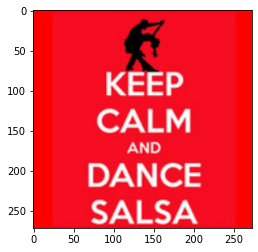

	 --------------------------------------------------------- 

Track: Money for Nothing

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Varias (80s,90s...)



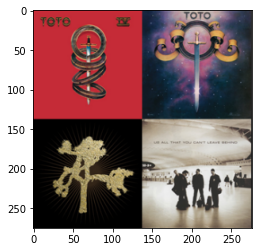

	 --------------------------------------------------------- 

Track: Physical

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Varias (80s,90s...)



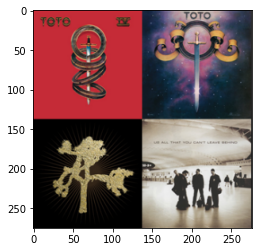

	 --------------------------------------------------------- 

Track: Every Rose Has Its Thorn - Remastered 2003

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Electronic



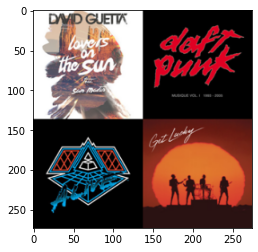

	 --------------------------------------------------------- 

Track: American Soul

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Electronic



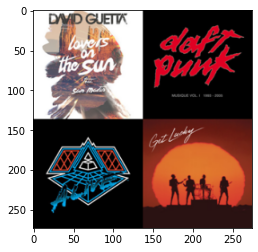

	 --------------------------------------------------------- 

Track: Hearts On Fire - From "Rocky IV" Soundtrack

True Playlist:  Varias (80s,90s...) 

Predicted Playlist: Varias (80s,90s...)



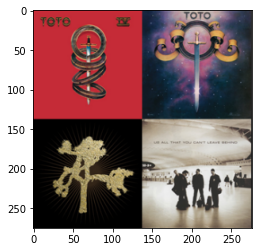

	 --------------------------------------------------------- 



In [65]:
plays = ['Electronic', 'Salsa', 'Varias (80s,90s...)']

for i in range(0, 7):
    
    tp = df_copy['playlist'][x_test_index[i]]
    tt = df_copy['track_name'][x_test_index[i]]
    p = np.argmax(pred2[i])
    
    if (p == 0):
        
        print('Track: ' + tt +'\n')
        print('True Playlist: ', tp, '\n')
        print('Predicted Playlist: ' + plays[p] +'\n')
        img = mpimg.imread('./pics/' +str(p) + '.png')
        imgplot = plt.imshow(img)
        plt.show()
        print('\t --------------------------------------------------------- \n')
        
    elif (p == 1):
        
        print('Track: ' + tt +'\n')
        print('True Playlist: ', tp, '\n')
        print('Predicted Playlist: ' + plays[p] +'\n')
        img = mpimg.imread('./pics/' +str(p) + '.png')
        imgplot = plt.imshow(img)
        plt.show()
        print('\t --------------------------------------------------------- \n')
        
    elif (p == 2):
        
        print('Track: ' + tt +'\n')
        print('True Playlist: ', tp, '\n')
        print('Predicted Playlist: ' + plays[p] +'\n')
        img = mpimg.imread('./pics/' +str(p) + '.png')
        imgplot = plt.imshow(img)
        plt.show()
        print('\t --------------------------------------------------------- \n')
        
        
    

## Save the Model

In [54]:
# save the model to disk

import joblib
filenames = 'finalized_model_NNV3_ELM.sav'
# Modelo, en filename 
joblib.dump(NNV2, filenames)  

['finalized_model_NNV3_ELM.sav']

## Load the Model

In [40]:
# load the model from disk
filenames = 'finalized_model_V1.sav'
NN = joblib.load(filenames)
loss, test_a = NN.evaluate(X_test, y_test)
print(test_a)

329/329 [==============================] - 0s 209us/step
0.8176291584968567
